# Project: Medical Appointment No Shows

**!this is a WIP!**

This is my second real project related to my Udacity's nanodegree and its purpose is only to:
- wrangling the data
- make analysis based on my questions
- draw conclusions about my findings

I choose this problem because: 
- I live in Brazil and this motivate's me 
- This problem is on Kaggle so
  - I can get inspiration in other kernel's as I'm starting in this area
  - I can publish my first kernel
  - I'm publishing as a public kernel and that point already cover the step four of the project **"Share your findings"**


## Table of Contents
<ul>
<li>
    <a href="#intro">1. Introduction</a>
    <ul>
        <li><a href="#first-impressions">1.1. First impressions</a></li>
        <li><a href="#questions">1.2. Questions</a></li>
    </ul>
</li>
<li>
    <a href="#wrangling">2. Data Wrangling</a>
    <ul>
        <li><a href="#general-properties">2.1. General Properties</a></li>
        <li><a href="#data-cleaning">2.2. Data Cleaning</a></li>
    </ul>
</li>
<li>
    <a href="#eda">3. Exploratory Data Analysis</a>
    <ul>
        <li>
            <a href="#age">3.1. Age</a>
        </li>
        <li>
            <a href="#waiting-days">3.2. Waiting days</a>
            <ul>
                <li><a href="#analysing-the-decrease-after-a-month">3.2.1. Analysing the decrease after a month</a></li>
            </ul>
        </li>
        <li>
            <a href="#received-sms">3.3. Received sms</a>
        </li>
        <li>
            <a href="#appointment-week-day">3.4. Appointment week day</a>
        </li>
        <li>
            <a href="#gender">3.5. Gender</a>
        </li>
        <li>
            <a href="#neighbourhood">3.6. Neighbourhood</a>
        </li>
        <li>
            <a href="#patient-id">3.7. Patient Id</a>
        </li>
        <li>
            <a href="#answering-questions">3.8. Answering questions</a>
        </li>
    </ul>
</li>
<li><a href="#conclusions">4. Conclusion</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

This analysis consist in explore a dataset containing aproximately 100k medial appointments from the Brazilian public health system known as [SUS (Single Health System)](https://en.wikipedia.org/wiki/Sistema_%C3%9Anico_de_Sa%C3%BAde). We're gonna explore the [*no-show appointments dataset*](https://www.kaggle.com/joniarroba/noshowappointments) dataset using this variables:

- **PatientId:** Identification of a patient 
- **AppointmentID:** Identification of each appointment 
- **Gender:** Male or Female 
- **DataMarcacaoConsulta:** The day of the actuall appointment, when they have to visit the doctor 
- **DataAgendamento:** The day someone called or registered the appointment
- **Age:** How old is the patient 
- **Neighbourhood:** Where the appointment takes place
- [**Scholarship:**](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) True or False, indicates if the patient is in the *Bolsa Familia* program
- **Hipertension:** True or False
- **Diabetes:** True or False 
- **Alcoholism:** True or False 
- **Handcap:** True or False 
- **SMS_received:** 1 or more messages sent to the patient 
- **No-show** "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

We're aiming to find possible reasons for patient no-showing at the scheduled appointments.

In [204]:
# first let's load our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("../input/medicalappointmentnoshown/KaggleV2-May-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [205]:
# let's see from which period theese appointments are
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [206]:
# then let's see the shape of our data
df.shape

(110527, 14)

In [207]:
# and get general numeric attributes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id="first-impressions"></a>
### 1.1. First impressions

First of all, we can notice that:
- We have 110k+ rows and 14 columns in this dataset (as explained on the challenge overview)
- I want to check if the patientId is duplicated since I don't know if they can have more than one appointment
- Depending on the analysis, maybe the **PatientId**, **AppointmentID** and **Neighbourhood** be useless for the analysis
- It's important to highlight that the **No-show** column value **Yes** means that the pacient didn't show at the appointment

Also we can already draw some assumptions:
- there are more than 100k appointments scheduled in a period of ~2 months and that's really impressive
- most of the patients have about 37 yeas old with almost no scholarship (9%)
- in mean 
  - 19% of the patients have hipertension
  - 7% of the patients have diabetes
  - 3% of the patients suffers from alcoholism
  - 2% of the patients are handicapped
  
I'll analyse the **"No-Show"** as my dependent variable since to me it's the most important one and it's strongly related to what we want to discover here.

And I'll use all dataset variables in my analysis, I just want to check on the **Data wrangling** stage if we really need the:
- Patient id
- Appointment id
- Neighbourhood

Since it look's like this variables are not that important for this analysis.

<a id="questions"></a>
### 1.2. Questions

The main questions I want to answer are:
- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?
- There are any relation on these variables that can lead us to a more specific group of patients?
- The day of the week of the appointment influences the patient no showing?
- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
- There are patients no showing in appointments on the same day?

<a id='wrangling'></a>
## 2. Data Wrangling

In this section the data will be analysed and cleaned, dealing with missing values or weird values.
Also we're gonna explore in a deeper lever in a way that maybe we can formulate more questions.

<a id="general-properties"></a>
### 2.1. General Properties

Here we're gonna explore our dataset properties checking for:
- What kind of variables we need to:
  - convert the data type
  - drop from the dataset
- Check for duplicates
- Check for weird values (outliers)
- Gather more information about a specific variable
- Check if we need to create more columns with usefull data for the exploration

In [208]:
# checking column information for missing values and strange types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [209]:
# checking for general data duplicates
df.duplicated().sum(), df.PatientId.duplicated().sum(), df.AppointmentID.duplicated().sum()

(0, 48228, 0)

In [210]:
# checking all possible values on some columns
print(df.Gender.unique())
print(sorted(df.Age.unique()))
print(sorted(df.Neighbourhood.unique()))
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())
print(df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

It looks like we have a good dataset: 
- no missing lines 
- we discover that indeed we need the **Patient ID** since it seems some patients try to make new appointments
- there are no weird values on most columns

But we'll need to do some cleaning here:
- we need to fix some data typings
  - ScheduledDay and AppointmentDay makes sense to be a date/datetime type
  - No-Show makes sense to be a boolean
  - PatientId makes sense to be converted as string to prevent from being applied as a numerical operation since it represents the patient identification
- **Appointment ID** seems to not be usefull for this analysis
- **Handcap** variable have values beyond True and False, and we can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) that this occurs because the handcap field represents the number of patient disabilities

And we can also make more questions:
- On the problem summary they don't mention on which location we're analysing, I've thought that we're analysing data from several cities from Brazil, but it seams that we're seing a specific region
  - We can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#) that this dataset contains appointments from *Vitória - ES* in Brazil and this turns out to be even more impressive that there are more than 100k schedulled in a ~2 month period in 2016
  
Now we can analyse also the neighbourhood data either!

<a id="data-cleaning"></a>
### 2.2. Data Cleaning

Here we're need to:
- remove useless columns
- rename the columns to use easier names during the exploration while fixing typos
- format patient id column to string
- format all date related columns to the correct type
- remove the weird age value that is less than zero
- format the handicap field correctly, since we only want to know if the patient is handicap and not how many disabilities they have
- add new columns
  - appointment_week_day: to show what day of the week the appointment was scheduled
  - appointment_waiting_time: waiting time to the appointment

In [211]:
# let's remove some useless columns
# I think the appointmentID is useless for this analysis
df.drop(['AppointmentID'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [212]:
# renaming all columns to simpler names for our exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handicap', 'received_sms', 'no_show'],
      dtype='object')

In [213]:
# formatting the patient_id column as string
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))

In [214]:
# formatting the date time 'scheduled_day' and 'appointment_day' columns
# i'm just testing different forms of time conversion here
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = df.appointment_day.apply(np.datetime64)

df.scheduled_day.head(1), df.appointment_day.head(1)

(0   2016-04-29 18:38:08
 Name: scheduled_day, dtype: datetime64[ns], 0   2016-04-29
 Name: appointment_day, dtype: datetime64[ns])

In [215]:
# formatting the 'no_show' column with lower cases
df.no_show = df.no_show.map({ 'No': 'no', 'Yes': 'yes' })

df.no_show.unique()

array(['no', 'yes'], dtype=object)

In [216]:
# discart the ages bellow zero
df = df.query('age >= 0')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [217]:
# remove the weird values from handcap variable
df.loc[df.handicap > 1, 'handicap'] = 1
df.handicap.unique()

array([0, 1])

In [218]:
# creating the first column "appointment_week_day"
df['appointment_week_day'] = df.appointment_day.map(lambda day: day.day_name())
df.appointment_week_day.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: appointment_week_day, dtype: object

In [219]:
# creating the second column "appointment_waiting_time"
df["appointment_waiting_days"] = df.appointment_day - df.scheduled_day
df.appointment_waiting_days.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: appointment_waiting_days, dtype: timedelta64[ns]

In [220]:
# well it seams that some are treated on the same day that they scheduled
# we can prevent that weird value by calculating the the "absolute value" of this column
# and then converting the "time" to "days"
df.appointment_waiting_days = df.appointment_waiting_days.abs().dt.days
df.appointment_waiting_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: appointment_waiting_days, dtype: int64

In [221]:
# let's see how our data looks like after all cleanning
df.head(5)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,appointment_week_day,appointment_waiting_days
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,no,Friday,0
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,no,Friday,0
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,no,Friday,0
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no,Friday,0
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,no,Friday,0


It seams we have all the data we need to start exploring and answer the questions.

<a id='eda'></a>
## 3. Exploratory Data Analysis

First, let's review all questions that I want to answer:

- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?
- There are any relation on these variables that can lead us to a more specific group of patients?
- The day of the week of the appointment influences the patient no showing?
- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
- There are patients no showing in appointments on the same day?

Let's:
- analyse our data
- mix them up
- get assumptions along the way
- answer our questions

In [222]:
# first let's re-see our dataset description
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,appointment_waiting_days
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,9.532915
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,15.027724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


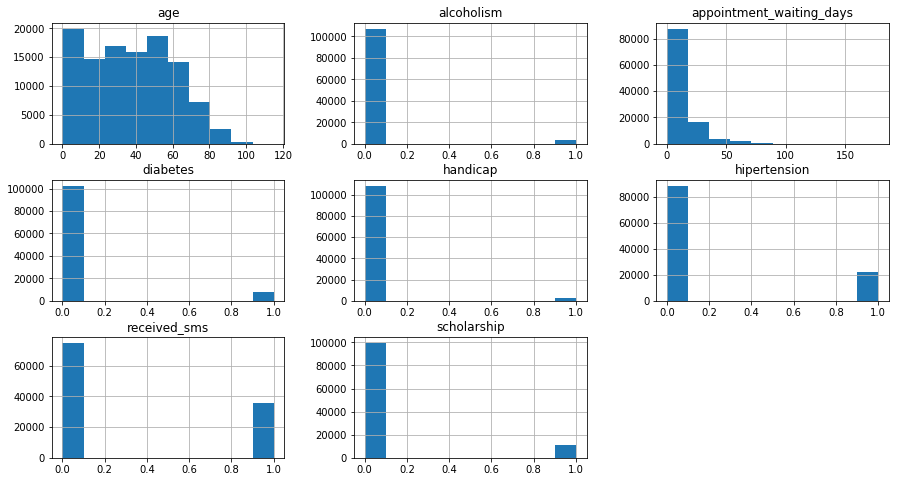

In [223]:
# and plot basic histogram charts
df.hist(figsize=(15, 8));

- most of the patients 
  - are bellow 60 years old
  - doesn't suffer from alcoholism/diabetes/hipertension
  - are not handicapped
  - doesn't received a reminder sms
  - aren't in the "Bolsa familia" program
  - doesn't missed the appointment

I think in this case the **age** is the most relevant variable that we can analyse, since it's the only one that have a better distribution between the amount of patients.

Also we can check out the **appointment_waiting_days** since it's one of the most relevant variables that we can mix up. 

And the **received_sms** since it is a 75 percentile and is the variable that have the most difference between the other boolean variables.

I'll se this variables one by one a mix them up with our categorical variables:
- appointment_week_day
- gender
- neighbourhood
- patient_id

In [224]:
def show_no_show_trend(dataset, attribute, fit_reg = True):
    '''Prints a chart with no_show_rate explanation
    Syntax: show_no_show_trend(dataframe, attribute), where:
        attribute = the string representing the attribute;
        dataframe = the current dataframe;
    '''
    sns.lmplot(data = dataset, x = attribute, y = 'no_show_rate', fit_reg = fit_reg);    

def show_attribute_statistics(attribute, dataframe, scale = 0.06, sorter = False):
    '''Prints basic statistics from the attribute also plotting the basic chart. 
    Syntax: show_attribute_statistics(dataframe, attribute), where:
        attribute = the string representing the attribute;
        dataframe = the current dataframe;
        scale = what's the scale you want to converto;
        sorter = array representing the sort reindex;
    '''
    
    # grouping by the patients by attribute and see if there is any interesting data related to their no showing
    # also stripping unwanted attributes with crosstab - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
    dataset = pd.crosstab(index = dataframe[attribute], columns = dataframe.no_show).reindex(sorter).reset_index() if sorter else pd.crosstab(index = dataframe[attribute], columns = dataframe.no_show).reset_index()
    
    # replacing all none values with zero, since it's the count of patients on that categorie
    dataset['no'].fillna(value=0, inplace=True)
    dataset['yes'].fillna(value=0, inplace=True)

    # let's also record the rate of no-showing base on the attribute
    dataset["no_show_rate"] = dataset['yes'] / (dataset['no'] + dataset['yes'])
    dataset.no_show_rate.fillna(value=0.0, inplace=True)

    dataset["no_show_rate_value"] = dataset["no_show_rate"] * 100 
    dataset.no_show_rate_value.fillna(value=0.0, inplace=True)
    
    # plotting our data
    plt.figure(figsize=(30, 10))

    # scale data if needed
    dataset['no'] = dataset['no'] * scale
    dataset['yes'] = dataset['yes'] * scale

    # line chart
    plt.plot(dataset.no_show_rate_value.values, color="r")

    # bar chart
    plt.bar(dataset[attribute].unique(), dataset['no'].values, bottom = dataset['yes'].values)
    plt.bar(dataset[attribute].unique(), dataset['yes'].values)

    # configs
    plt.xlabel(attribute)
    plt.ylabel(f"amount of patients (scaled 1 to {scale * 100}%)")
    plt.legend(["not attended rate", "attended", "not attended"])

    plt.title("amount of patient by no show appointment groupped by %s" % attribute)

    plt.show();
    
    return dataset

<a id="age"></a>
### 3.1. Age

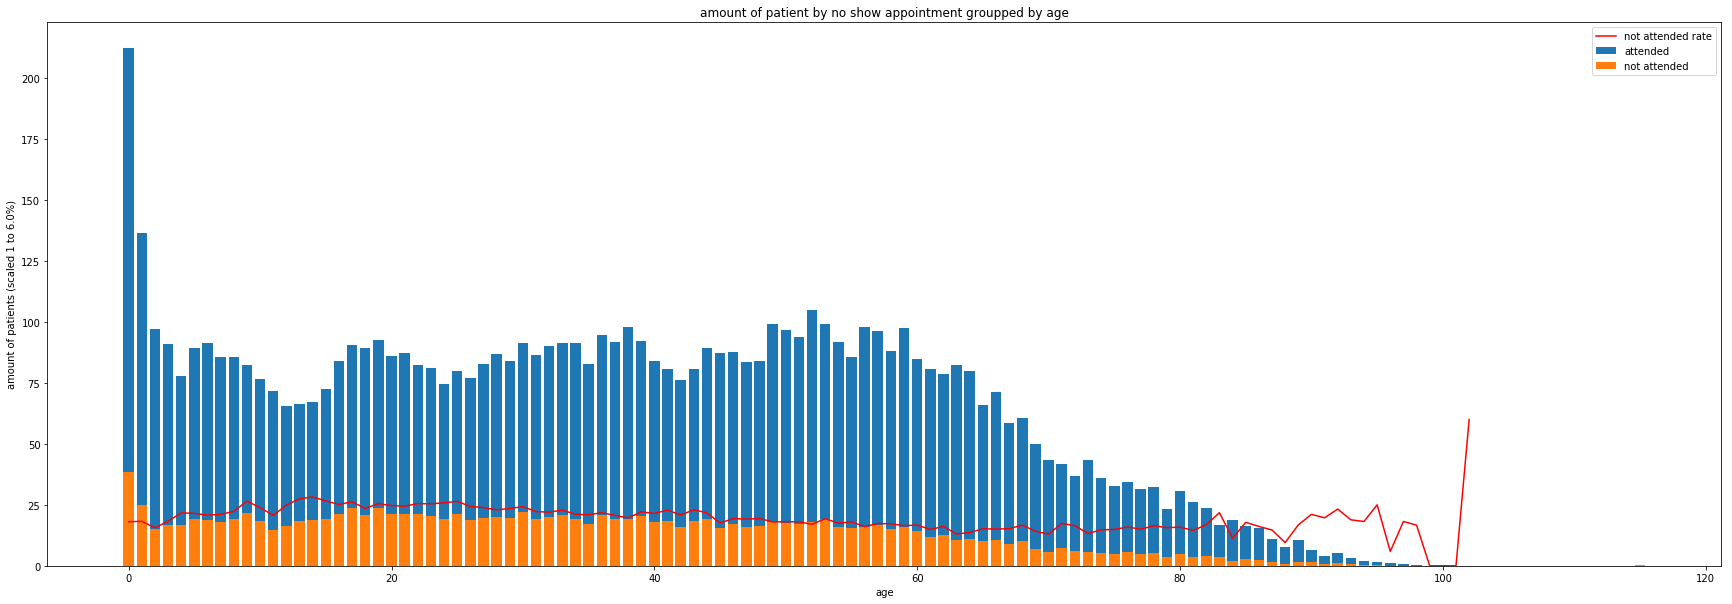

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


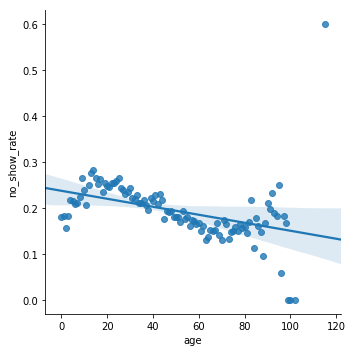

In [225]:
age_dataset = show_attribute_statistics("age", df);
show_no_show_trend(age_dataset, "age");

Through the charts above, it becomes evident that the **no-showing rate decreases as older the person is**.

It reaches higher rates when the patient is a baby/child maybe because:
- parents or guardians may have difficulties bringing the child to the appointment
- or maybe because there was a long wait until the attendance (but we'll se more about that later)

We have one outlier in ~120 years old patients, but we can ignore that case since we have only one patient.

<a id="waiting-days"></a>
### 3.2. Waiting days

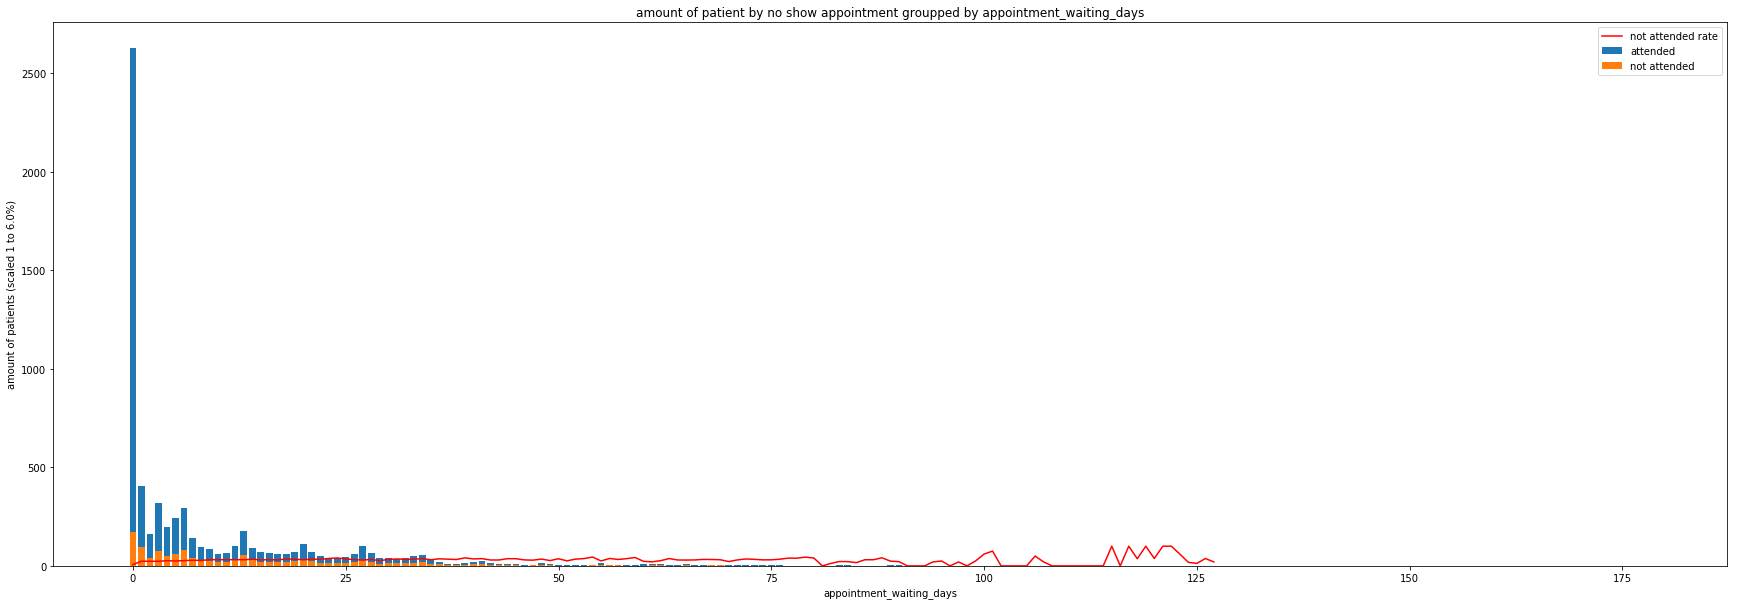

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


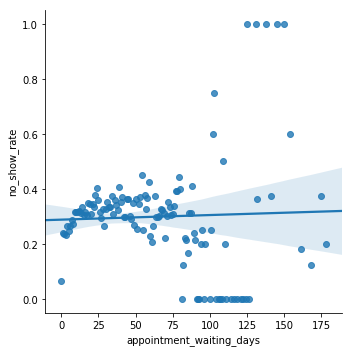

In [226]:
appointment_waiting_days_dataset = show_attribute_statistics("appointment_waiting_days", df)
show_no_show_trend(appointment_waiting_days_dataset, "appointment_waiting_days")

In the age case, maybe it's nicer if we can group that data, since we have a large amount of distribution between the points.

So I'll group by based on the user [tsilveira](https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis) on his kernel and using the cut method explained on [this article](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

So I'll categorize the data in these groups:

| waiting time | days |
| -- | -- |
| same day | 0 |
| week | 1 - 7 |
| month | 8 - 30 |
| quarter | 31 - 90 |
| semester | 91 - 180 |
| a lot of time | > 180 |

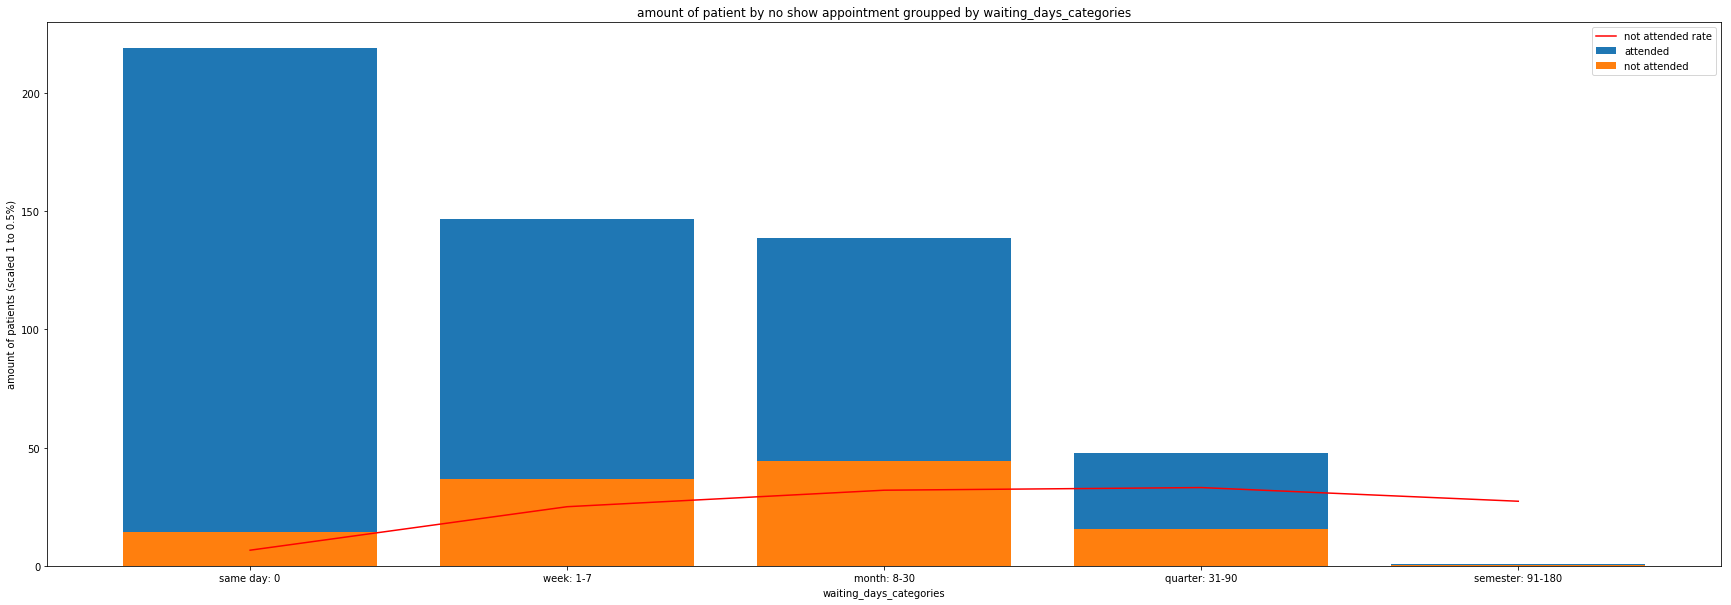

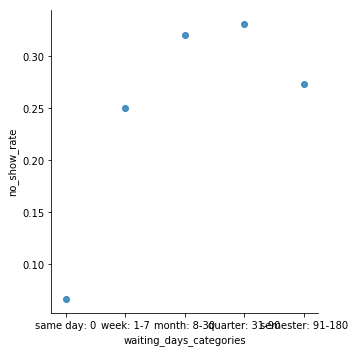

In [227]:
categories = pd.Series(['same day: 0', 'week: 1-7', 'month: 8-30', 'quarter: 31-90', 'semester: 91-180', 'a lot of time: >180'])
df['waiting_days_categories'] = pd.cut(df.appointment_waiting_days, bins = [-1, 0, 7, 30, 90, 180, 500], labels=categories)
waiting_days_categories_dataset = show_attribute_statistics("waiting_days_categories", df, 0.005)
show_no_show_trend(waiting_days_categories_dataset, "waiting_days_categories", False)

Through the chart above, it becomes evident that the **no-showing rate increases as times goes by until it reach a quarter**.

It reaches lower rates when the patient is attended on the same day that this may happen depending on the urgency or even if they go to the health center withou any scheduling.

One interesting thing is the fact of the rate start decreasing after a quarter of waiting time.

We can get the group of patients that are attended on the same day and analyse it's differences from patients from other groups.

<a id="analysing-the-decrease-after-a-month"></a>
#### 3.2.1. Analysing the decrease after a month

Just to see what's de difference between the semester group from others, let's split our data in groups:
- Attended on 
  - same day
  - between a week and a month
  - quarter
  - after a quarter (90 days)

In [228]:
# splitting data in groups
same_day_category = df[df.waiting_days_categories == categories[0]]
short_period_category = df.query(f"waiting_days_categories in ['{categories[1]}', '{categories[2]}']")
quarter_category = df[df.waiting_days_categories == categories[3]]
long_period_category = df[df.appointment_waiting_days > 90]

same_day_category.waiting_days_categories.unique(), short_period_category.waiting_days_categories.unique(), quarter_category.waiting_days_categories.unique(),  long_period_category.waiting_days_categories.unique()

([same day: 0]
 Categories (1, object): [same day: 0], [week: 1-7, month: 8-30]
 Categories (2, object): [week: 1-7 < month: 8-30], [quarter: 31-90]
 Categories (1, object): [quarter: 31-90], [semester: 91-180]
 Categories (1, object): [semester: 91-180])

In [229]:
print("Same day \n", same_day_category.mean(numeric_only=True))
print("\n")
print("Short period \n", short_period_category.mean(numeric_only=True))
print("\n")
print("Quarter \n", quarter_category.mean(numeric_only=True))
print("\n")
print("Long period \n", long_period_category.mean(numeric_only=True))

Same day 
 age                         35.104192
scholarship                  0.104786
hipertension                 0.183986
diabetes                     0.070588
alcoholism                   0.038584
handicap                     0.024078
received_sms                 0.000000
appointment_waiting_days     0.000000
dtype: float64


Short period 
 age                         38.412464
scholarship                  0.098887
hipertension                 0.213603
diabetes                     0.076413
alcoholism                   0.026505
handicap                     0.018617
received_sms                 0.515751
appointment_waiting_days    10.494767
dtype: float64


Quarter 
 age                         37.924987
scholarship                  0.065060
hipertension                 0.153903
diabetes                     0.049240
alcoholism                   0.016344
handicap                     0.011629
received_sms                 0.623887
appointment_waiting_days    45.455422
dtype: float64


L

Based on the findings above we can see the differences between the groups:

|              | Attended on the same day | Attended in a short period (week - month) | Attended in a period of 31-90 days (quarter) | Attended in a long period (> 90 days) |
| ------------ | ------------------------ | ----------------------------------------- | -------------------------------------------- | ------------------------------------- |
| Average age  | 35 years                 | 38 years                                  | 37 years                                     | **58 years**                          |
| Scholarship  | **~10%**                 | ~9%                                       | ~6%                                          | ~7%                                   |
| Hipertension | ~18%                     | ~21%                                      | ~15%                                         | **~57%**                              |
| Diabetes     | ~7%                      | 7%~                                       | ~4%                                          | **~14%**                              |

From this analysis we can conclude that the drastic drop on the no-show rating from the period longer than a quarter probably is **due to being an older public** who require regular medical follow-up and tend to schedule more appointments.

<a id="received-sms"></a>
### 3.3. Received sms

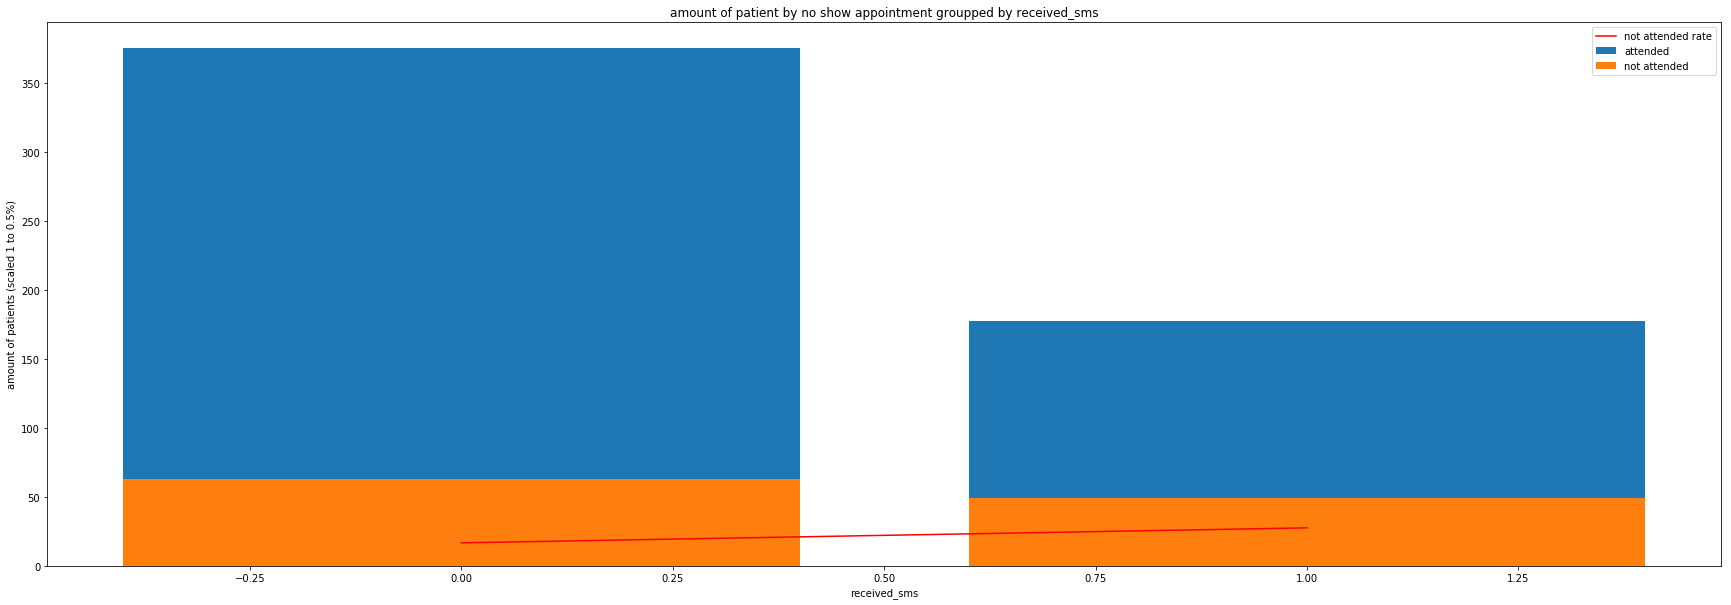

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


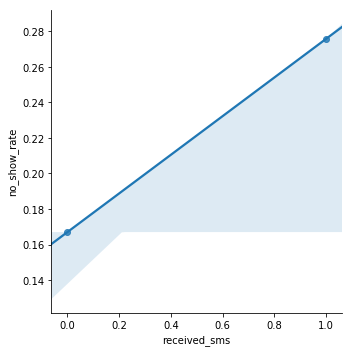

In [230]:
received_sms_dataset = show_attribute_statistics("received_sms", df, 0.005)
show_no_show_trend(received_sms_dataset, "received_sms")

Well, we don't have a greater difference, so this attribute may not be that relevant to conclude something about this data.

We can continue through the variables:
- appointment_week_day
- gender
- neighbourhood
- patient_id

Investigating it's relations with no-show.

<a id="appointment-week-day"></a>
### 3.4. Appointment week day

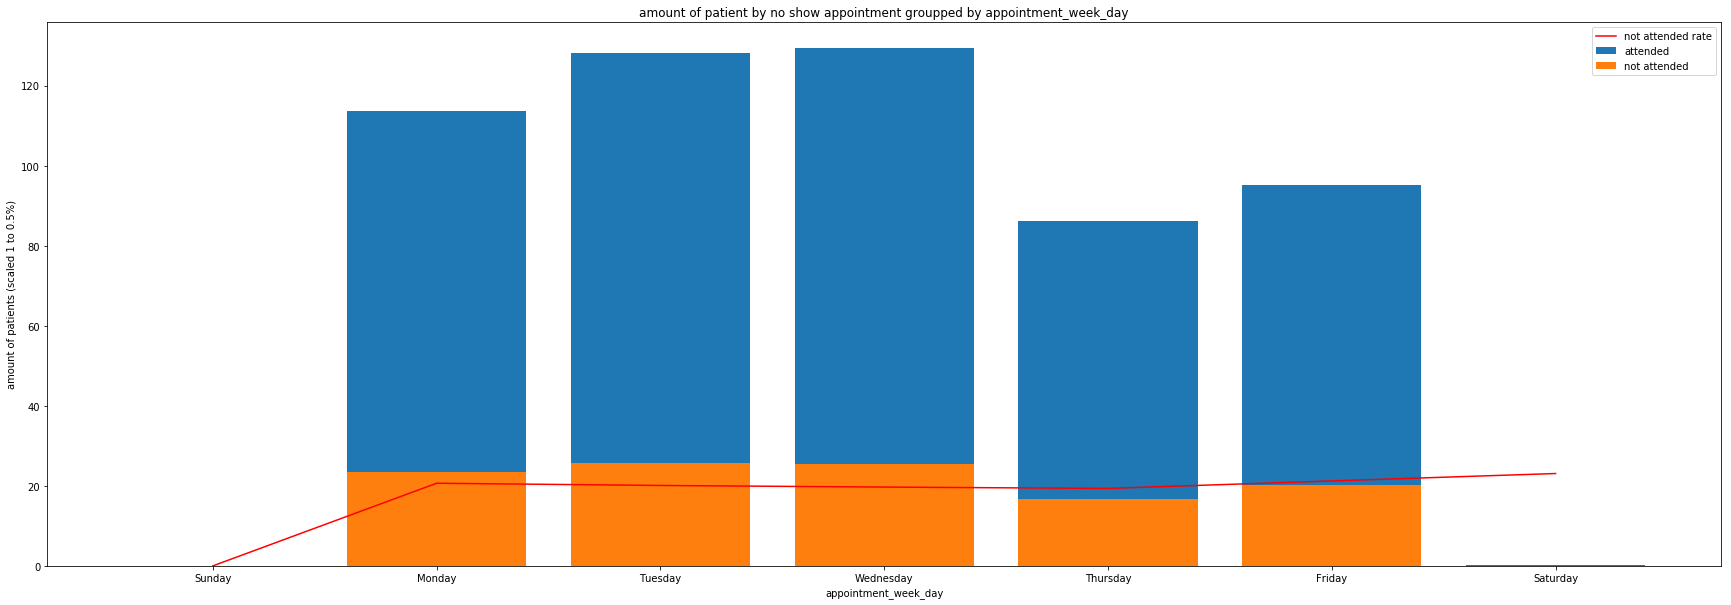

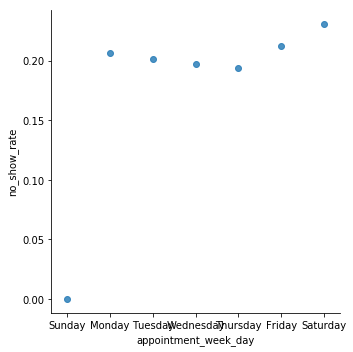

In [231]:
appointment_week_day_dataset = show_attribute_statistics("appointment_week_day", df, 0.005, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
show_no_show_trend(appointment_week_day_dataset, "appointment_week_day", False)

Through the chart above, we can see that the **no-showing rate increases during the week as soon as it starts**, and **we have a small drop on Thursday** but it keeps growing until the weekend.

It reaches lower rates when the patient is attended on thursdays but most of the time, the data is consistent between week days.

<a id="gender"></a>
### 3.5. Gender

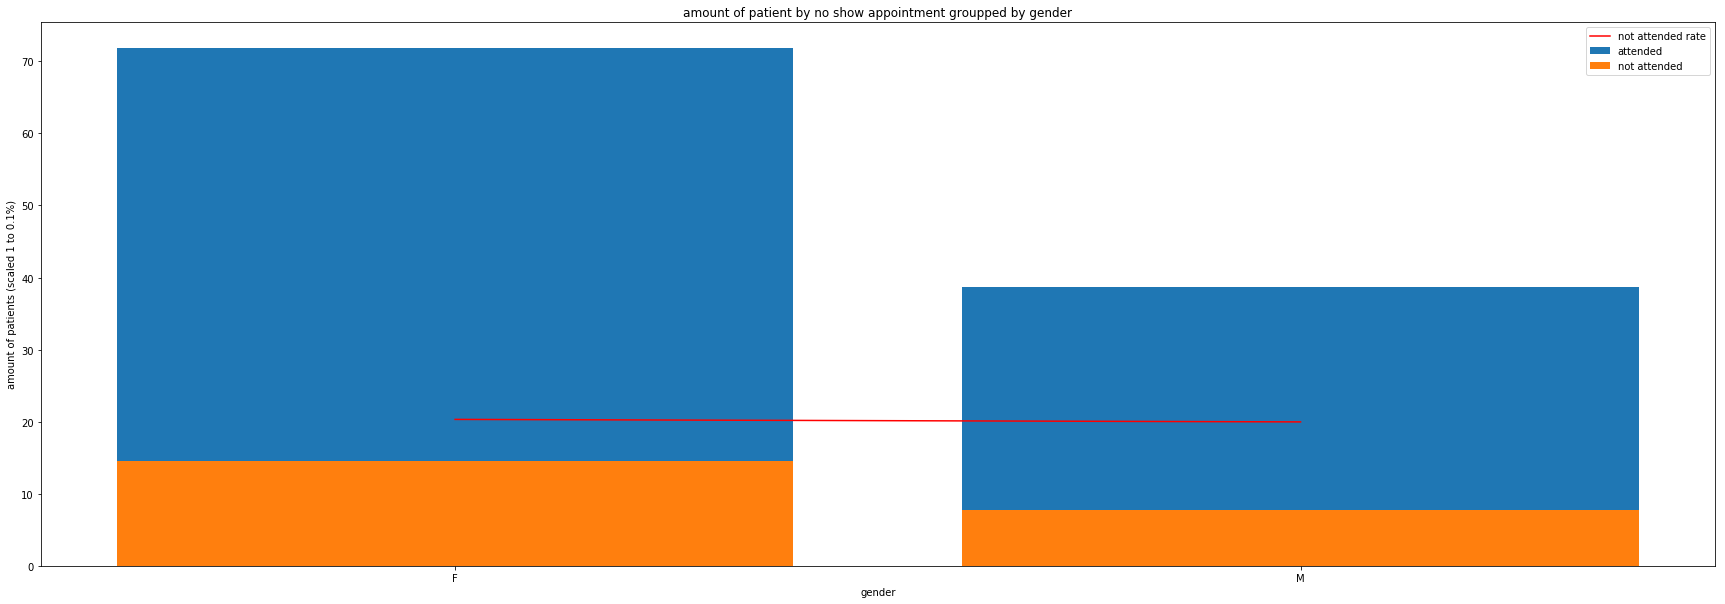

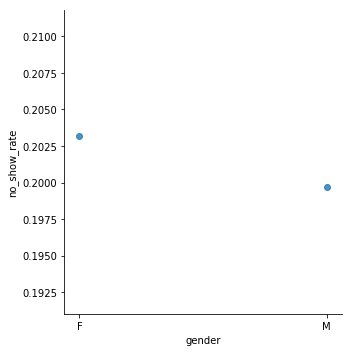

In [232]:
gender_dataset = show_attribute_statistics("gender", df, 0.001)
show_no_show_trend(gender_dataset, "gender", False)

Through the chart above, we can see that we have a large amount of female patients.

We can assume that in this context that women tend to care more about their health than man due to the massive difference from the consultants as we can see [here](https://www.everydayhealth.com/columns/health-answers/why-men-dont-go-to-the-doctor/) and the rate of no-showing rate of men is smaller than women.

So woman and men have a similar no-showing proportion.

<a id="neighbourhood"></a>
### 3.6. Neighbourhood

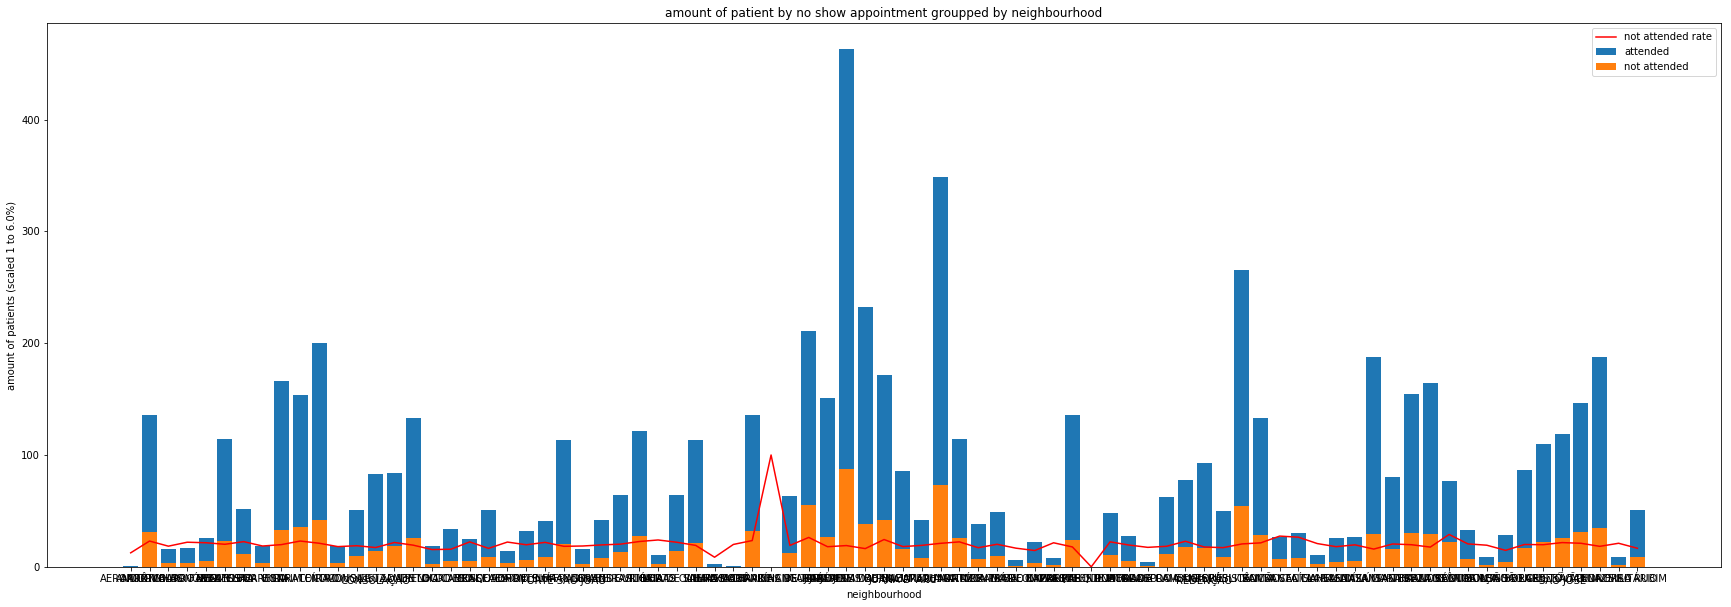

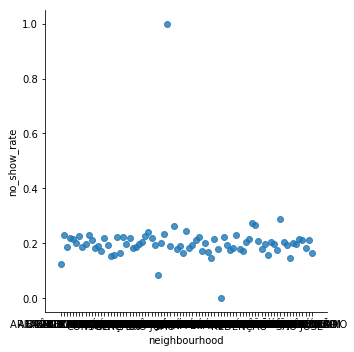

In [233]:
neighbourhood_dataset = show_attribute_statistics("neighbourhood", df);
show_no_show_trend(neighbourhood_dataset, "neighbourhood", False)

Well, we can't see too well our data, let's plot a better chart

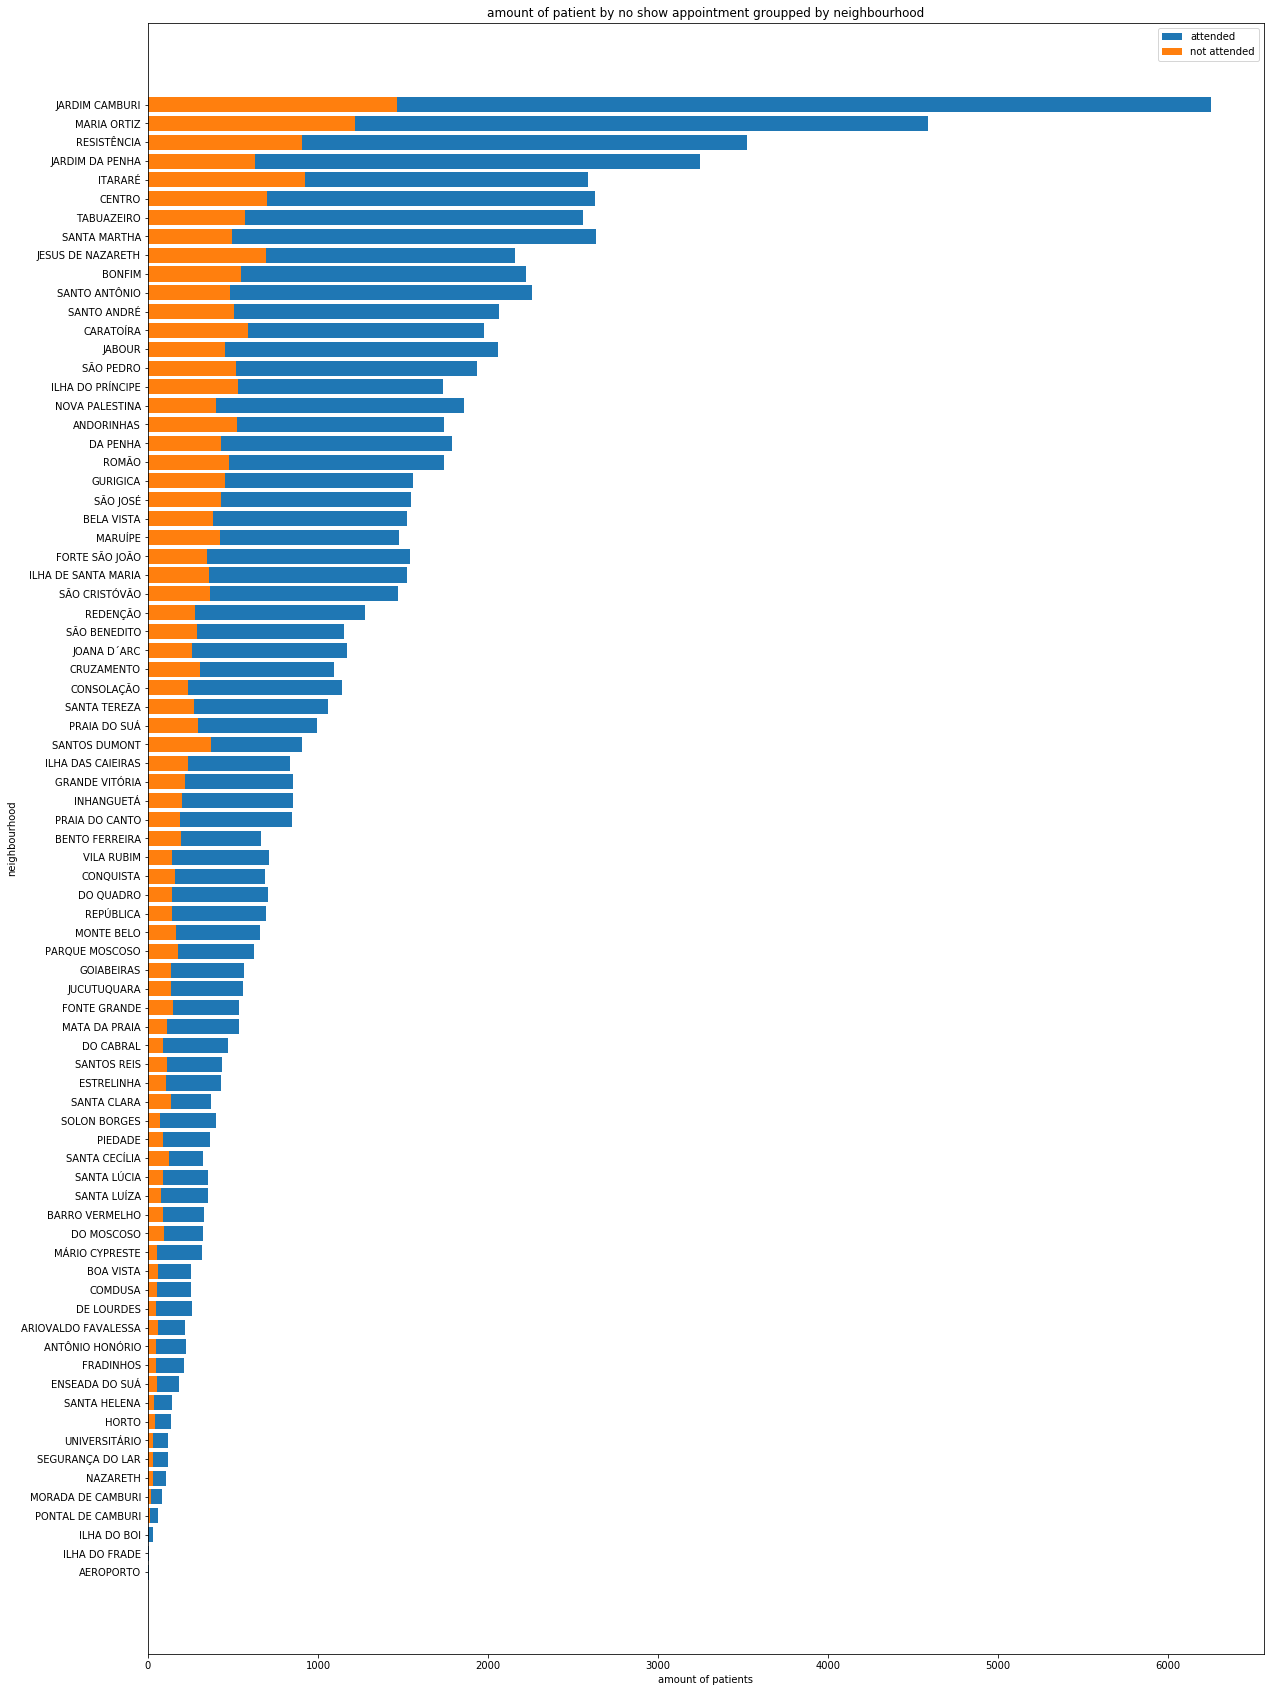

In [234]:
df_groupped_by_neighborhood = df.groupby(['neighbourhood', 'no_show']).count().unstack().patient_id
df_groupped_by_neighborhood["sum"] = df_groupped_by_neighborhood['no'] + df_groupped_by_neighborhood['yes']
df_groupped_by_neighborhood.sort_values(by="sum", inplace=True)
df_groupped_by_neighborhood.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(20, 30))

# bar chart
plt.barh(df_groupped_by_neighborhood.index, df_groupped_by_neighborhood['no'].values)
plt.barh(df_groupped_by_neighborhood.index, df_groupped_by_neighborhood['yes'].values)

# configs
plt.xlabel("amount of patients")
plt.ylabel("neighbourhood")
plt.legend(["attended", "not attended"])

plt.title("amount of patient by no show appointment groupped by neighbourhood")

plt.show();

As we can see, the **Jardim Camburi** is the one with most of the appointments in the state.

**Jardim Camburi** is the [most populous neighbourhood from "Espírito Santo"](https://pt.wikipedia.org/wiki/Jardim_Camburi)

Just to finish our analysis about the neighbourhood, let's check out its relation with the no-show attribute.

In [235]:
# getting all neighbourhoods data from patients that no-showed groupped by waiting days categories
df_no_shows_by_neighbourhood_waiting_days_categories = df.query('no_show == "yes"').groupby(['neighbourhood', 'waiting_days_categories']).count().patient_id.fillna(value=0).unstack()
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.0,0.0,1.0,0.0,0.0,0.0
ANDORINHAS,54.0,193.0,229.0,45.0,0.0,0.0
ANTÔNIO HONÓRIO,7.0,8.0,30.0,5.0,0.0,0.0
ARIOVALDO FAVALESSA,10.0,24.0,27.0,1.0,0.0,0.0
BARRO VERMELHO,15.0,27.0,46.0,3.0,0.0,0.0


For this analysis, we want to check out the relation between the neighbourhood and waiting days categorie group.

In order to do that maybe it's best if we use a [heatmap](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py), since we can compare the values between two categories

Also it's nice to normalize all data

In [236]:
# normalizing values from the dataframe you can check out the method for this here: https://stackoverflow.com/a/31480994
df_no_shows_by_neighbourhood_waiting_days_categories = df_no_shows_by_neighbourhood_waiting_days_categories.div(df_no_shows_by_neighbourhood_waiting_days_categories.sum(axis=1), axis=0)
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.000000,0.000000,1.000000,0.000000,0.0,0.0
ANDORINHAS,0.103647,0.370441,0.439539,0.086372,0.0,0.0
ANTÔNIO HONÓRIO,0.140000,0.160000,0.600000,0.100000,0.0,0.0
ARIOVALDO FAVALESSA,0.161290,0.387097,0.435484,0.016129,0.0,0.0
BARRO VERMELHO,0.164835,0.296703,0.505495,0.032967,0.0,0.0


In [237]:
# converting the normalized values to percentage
df_no_shows_by_neighbourhood_waiting_days_categories = (df_no_shows_by_neighbourhood_waiting_days_categories * 100).round(2)
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.00,0.00,100.00,0.00,0.0,0.0
ANDORINHAS,10.36,37.04,43.95,8.64,0.0,0.0
ANTÔNIO HONÓRIO,14.00,16.00,60.00,10.00,0.0,0.0
ARIOVALDO FAVALESSA,16.13,38.71,43.55,1.61,0.0,0.0
BARRO VERMELHO,16.48,29.67,50.55,3.30,0.0,0.0


In [238]:
# get all necessary data for plotting
neighbourhoods = df_no_shows_by_neighbourhood_waiting_days_categories.index
waiting_days_categories = df_no_shows_by_neighbourhood_waiting_days_categories.columns.values

no_show_values_by_neighbourhood = np.array(df_no_shows_by_neighbourhood_waiting_days_categories.values)

neighbourhoods, waiting_days_categories

(Index(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
        'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
        'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
        'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
        'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
        'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
        'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
        'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE',
        'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR',
        'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
        'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
        'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA',
        'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO',
        'PRAIA DO SUÁ', 'REDENÇÃO', '

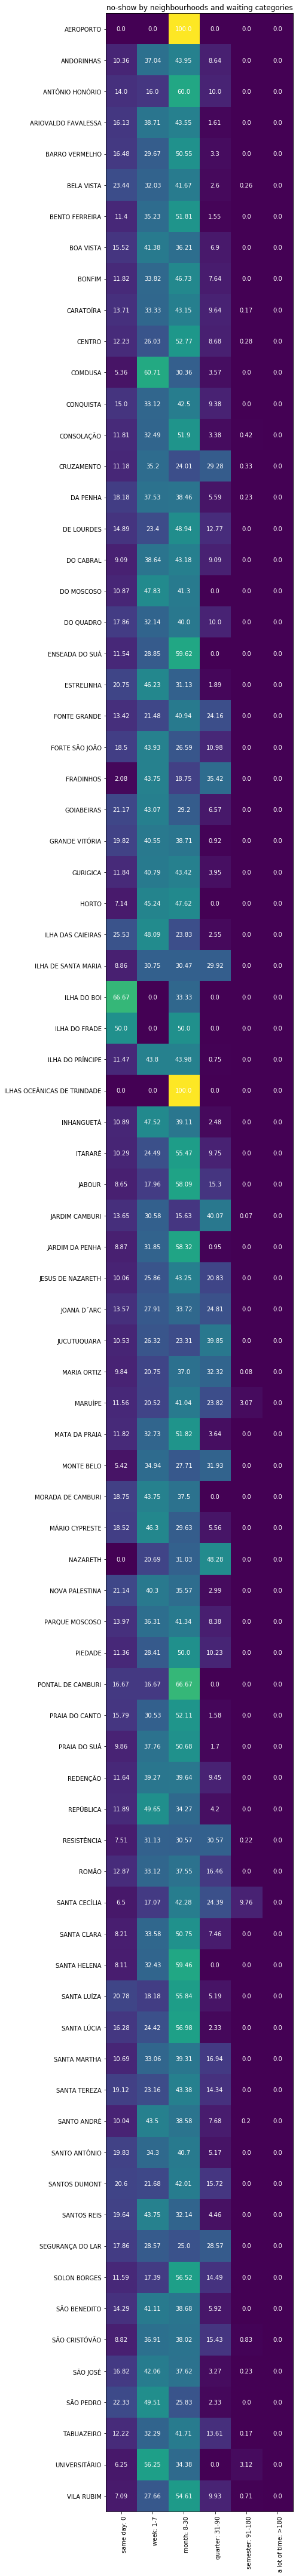

In [239]:
# plot the heatmap
figure, axes = plt.subplots(figsize=(60, 60))
axes.imshow(no_show_values_by_neighbourhood)

# show all the ticks
axes.set_xticks(np.arange(len(waiting_days_categories)))
axes.set_yticks(np.arange(len(neighbourhoods)))

# show all tick labels
axes.set_xticklabels(waiting_days_categories)
axes.set_yticklabels(neighbourhoods)

# Rotate the tick labels and set their alignment.
plt.setp(axes.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(neighbourhoods)):
   for j in range(len(waiting_days_categories)):
       axes.text(j, i, no_show_values_by_neighbourhood[i, j], ha="center", va="center", color="w")

axes.set_title("no-show by neighbourhoods and waiting categories")
figure.tight_layout()
plt.show()

As we can see in the charts above in general the no-showing rate increases as the waiting gets longer for most of neighborhood.

We have a small rate difference for each local, some neighborhoods have higher no-showing rates even for short waiting times (ex: Ilha do Boi and Comdusa).

Since we don't have enough data we can't investigate further for the reasons on such occurrences.

<a id="patient-id"></a>
### 3.7. Patient Id

In this section, we're digging up on patients that re-scheduled their appointments.

First let's filter our duplicated patients by its `no_show` and order them.

In [240]:
df_duplicated_patients = df[df.patient_id.duplicated() == True].groupby(['patient_id', 'no_show']).no_show.count().unstack()
df_duplicated_patients.fillna(0, inplace=True)
df_duplicated_patients["sum"] = df_duplicated_patients['no'] + df_duplicated_patients['yes']
df_duplicated_patients["no_show_rate"] = df_duplicated_patients['yes'] / (df_duplicated_patients['no'] + df_duplicated_patients['yes'])
df_duplicated_patients["no_show_rate_value"] = df_duplicated_patients["no_show_rate"] * 100
df_duplicated_patients.sort_values(by="sum", inplace=True)
df_duplicated_patients.dropna(inplace=True)

df_duplicated_patients.head()

no_show,no,yes,sum,no_show_rate,no_show_rate_value
patient_id,,,,,
111124532532143,0.0,1.0,1.0,1.0,100.0
628995781213433,0.0,1.0,1.0,1.0,100.0
628998777278238,1.0,0.0,1.0,0.0,0.0
629128459759336,0.0,1.0,1.0,1.0,100.0
629177334342,1.0,0.0,1.0,0.0,0.0


In [241]:
df_duplicated_patients.describe()

no_show,no,yes,sum,no_show_rate,no_show_rate_value
count,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000
mean,1.562902,0.415357,1.978260,0.209639,20.963880
std,2.188191,0.789683,2.372108,0.356043,35.604256
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,2.000000,0.333333,33.333333
max,86.000000,17.000000,87.000000,1.000000,100.000000


Wow, there's a lot of patients! 

As we can see in the statistics above:
- Most of patients are showing at their appointments but we have **~20%** of no_showing rate
- There are patients that maybe just missed the appointment and re-scheduled
- We have patients that are on the 86th consulting meaning that is a regular patient

We can group the duplicated patients on groups just like we did on the waiting days categorization section:

- 1 appointment
- 2 to 5 appointments
- 6 to 20 appointments
- 21 to 40 appointments
- 41 to 60 appointments
- \> 60 appointments

In [242]:
duplicated_categories = pd.Series(['1', '2-5', '6-20', '21-40', '41-60', '>60'])
df_duplicated_patients['appointments_count_category'] = pd.cut(df_duplicated_patients['sum'], bins = [-1, 1, 5, 20, 40, 60, 500], labels=duplicated_categories)
df_duplicated_patients.head()

no_show,no,yes,sum,no_show_rate,no_show_rate_value,appointments_count_category
patient_id,,,,,,
111124532532143,0.0,1.0,1.0,1.0,100.0,1
628995781213433,0.0,1.0,1.0,1.0,100.0,1
628998777278238,1.0,0.0,1.0,0.0,0.0,1
629128459759336,0.0,1.0,1.0,1.0,100.0,1
629177334342,1.0,0.0,1.0,0.0,0.0,1


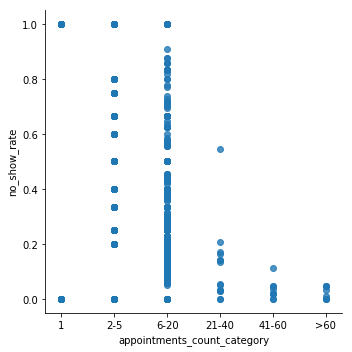

In [243]:
# see the distribution of the categories vs the no showing rate
show_no_show_trend(df_duplicated_patients, "appointments_count_category", False)

In [244]:
# check the rate of not attending by groups
df_duplicated_patients_group_by_category = df_duplicated_patients.groupby('appointments_count_category')
patients_attended = df_duplicated_patients_group_by_category.no.sum()
patients_not_attended = df_duplicated_patients_group_by_category.yes.sum()

patients_not_attended / (patients_attended + patients_not_attended)

appointments_count_category
1        0.204750
2-5      0.216834
6-20     0.226473
21-40    0.105495
41-60    0.032258
>60      0.023766
dtype: float64

Finally we can conclude that:

In patients that have duplicated appointments:
- The rate of not attending is higher on patients that schedule from 1 to 20 appointments **~21%**
- This rate drastically drop from patients on the **> 21 appointment group** to **~10%** and patients **> 41 appointments** this rate drops even further to **~3%** since they seems to be regular patients

<a id="answering-questions"></a>
### 3.8. Answering questions

#### Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?

There isn't a clear conclusin here, we actually see a lot of interesting insights analysing:
- Age
- Waiting days
- Received Sms
- Appointment week day
- Gender
- Neighbourhood
- Duplicated patients

We only can discart the **received sms** since the difference is not meaningfull to reach any conclusion.

But all other variables have great relevance that may influences the patient to no showing.

Maybe we can in a further analysis mix them up to find a more interesting pattern.

#### There are any relation on these variables that can lead us to a more specific group of patients?

Yes, we found some specific group of patients:

- Age 
  - younger patients tend to no-showing
- Waiting days
  - elder patients tend to schedule their appointments for long periods of waiting days
- Neighbourhood
  - we found some places that have a more frequent no-showing rate that could be further analysed
- Duplicated patients
  - the group of patients that have from 1 to 20 appointments scheduled

#### The day of the week of the appointment influences the patient no showing?

Actually not that much, there is a very subtle decrease of the no-showing rate for patients that attend on **Thursdays**

#### The waiting time of the patient between the schedule day and the appointment day influences it's no showing?

Yes, most of the patients are attended on the same day having the lowest no-show rate.

After that the no-showing rate grows until reach a quarter (~90 days) of waiting, after that the rate start dropping.

#### There are patients no showing in appointments on the same day?

Yes, but is one of the lowest rate of no-showing rate of the groups.

<a id='conclusions'></a>
## 4. Conclusion

This analysis had as purpose to perform an analysis of a database of medical consultations, containing more than 100k appointments which approximately **30%** of the patients have not attended.

The notebook had the purpose of gather some insights on the possible causes of this missing appointments.

I would also like to leave a warning that it is not possible to affirm any veracity of the provided statements and statistical validity of the data but the insights obtained through this analysis can, so instead, inform and direct in-depth research on the subject in order to validate the causes of the missing appointments and find more conclusive insights.

We find some interesting insights analysing the attributes, summing up:

### Age

The no-showing rate of age decresases as older the person is. 

It reaches higher rates when the patient is a **baby/child** and the lowest rates when the patient is around **96 years old.**

The higher rates may occur because:
- parents or guardians may have difficulties bringing the child to the appointment
- there was a long wait until the attendance (but we'll se more about that later)

And the lower rates may occur because:
- we're dealing with older population meaning that as times goes by people tend to visit and be present at health appointments

### Waiting days

We groupped the waiting days in categories:

| waiting time | days |
| -- | -- |
| same day | 0 |
| week | 1 - 7 |
| month | 8 - 30 |
| quarter | 31 - 90 |
| semester | 91 - 180 |
| a lot of time | > 180 |

The no-showing rate increases as time goes by until it reach a quarter.

It reaches lower rates when the patient is attended on the same day and start decreasing after a quarter of waiting time.

We can see on the table bellow the characteristics of patients splitted by the groups.

|              | Attended on the same day | Attended in a short period (week - month) | Attended in a period of 31-90 days (quarter) | Attended in a long period (> 90 days) |
| ------------ | ------------------------ | ----------------------------------------- | -------------------------------------------- | ------------------------------------- |
| Average age  | 35 years                 | 38 years                                  | 37 years                                     | **58 years**                          |
| Scholarship  | **~10%**                 | ~9%                                       | ~6%                                          | ~7%                                   |
| Hipertension | ~18%                     | ~21%                                      | ~15%                                         | **~57%**                              |
| Diabetes     | ~7%                      | 7%~                                       | ~4%                                          | **~14%**                              |

From this analysis we can conclude that the drastic drop on the no-show rating from the period longer than a quarter probably is **due to being an older public** who require regular medical follow-up and tend to schedule more appointments.

### Received Sms

We didn't found any relevant aspect that can bring a consistent insight by analysing this attribute.

Only that patients that have received sms have they're no-show rate **increased** in **~10%** related to patients that haven't received any reminder.

### Appointment week day

The no-showing rate increases during the week as soon as it starts.

But we have a small drop on **Thursdays** but is not that significant compared to all other weekdays.

### Gender

There is a big difference on the amount of woman attending to consultations compared to the men.

We have a large amount of female patients, assuming the context that women tend to care more about their health than man due to the massive difference from the consultants as we can see [here](https://www.everydayhealth.com/columns/health-answers/why-men-dont-go-to-the-doctor/). 

But woman and men have a similar no-showing proportion.

### Neighbourhood

Since we're analysing data from *Vitória - ES* we can see that **Jardim Camburi** is the one with most of the appointments in the state and actually is the [most populous neighbourhood from "Espírito Santo"](https://pt.wikipedia.org/wiki/Jardim_Camburi).

The no-showing rate increases as the waiting gets longer for most of neighborhood.

We have a small rate difference for each local, some neighborhoods have higher no-showing rates even for short waiting times (ex: Ilha do Boi and Comdusa).

Since we don't have enough data we can't investigate further for the reasons on such occurrences.

### Duplicated patients

We checked out patients that have more than one appointment having a no-show rate of **~20%** in this cases.

The rate of not attending is higher on patients that schedule from 1 to 20 appointments **~21%**

This rate drastically drop from patients on the **> 21 appointment group** to **~10%** and patients **> 41 appointments** this rate drops even further to **~3%**

This rate drastically drop from patients on the **> 21 appointment group** to **~10%** and patients **> 41 appointments** this rate drops even further to **~3%** since they seems to be regular patients

In [245]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255